# Machine Learning in Python for Neuroimaging

This notebook, prepared by Désirée Lussier, is to provide an introduction to machine learning for BrainHack School 2022. It has been adapted from Brainhack Global MTL 2019 traintrack tutorial (https://github.com/BrainhackMTL/global2019-traintrack/blob/master/machine_learning.ipynb) by Désirée Lussier which was modified from the MAIN 2019 training given by Alexadre Hutton (https://github.com/main-training/main-training-nilearn-ml/blob/master/01_intro_ml.ipynb; https://github.com/main-training/main-training-nilearn-ml/blob/master/01_intro_ml_slides.odp) and sklearn tutorial (http://scipy-lectures.org/packages/scikit-learn/index.html). 

This training is meant to give a brief overview of the basics of machine learning in Python3. For more complete training or other specific examples please see the additional BrainHack School modules (https://school.brainhackmtl.org/modules/) above MAIN courses (https://github.com/main-training) and documentation for Scikit Learn (https://scikit-learn.org/stable/).

# Training Outline

__Machine Learning with Scikit Learn__<br>
<li>Machine learning classification examples</li>
<li>Model evaluation</li>
<li>Model complexity</li>


# What is machine learning?

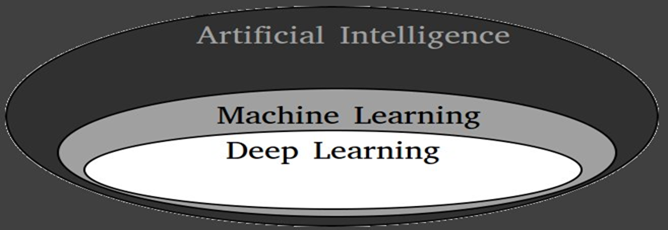

In __machine learning__ models with parameters which are __optimized__ according to previously-seen data.

Machine learning (ML) can be divided into subcategories:

## Supervised Learning
We have observations __X__ we want to use __to predict Y__ <br><br>
__X__: data, features, inputs<br>
__Y__: target, labels, outputs<br>
The goal is to find a model which best predicts __Y based on X__:<br>
Y = f(X)<br>

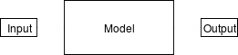

Models are further divided:<br>
<li><b>Classification</b>: Predicting ordinal numbers; determining classes for inputs</li>
<li><b>Regression</b>: Predicting continuous values</li>

## Unsupervised Learning
We have observations __X__<br>
The goal is to __extract information about X__<br>
E.g.: finding a representation, cluster the data

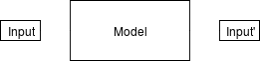 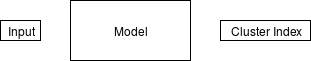

ML models are typically developed in some variation of:<br>
<li>Parameter training</li>
<li>Model evaluation</li>
<li>Model selection</li>
<li>Model generalization</li>

Let's start off by taking a look at some classification examples:

# Scikit-learn: Classification

Import relevant packages:

In [1]:
import sklearn
import numpy as np
from matplotlib import pyplot as plt

Scikit-learn ("sklearn") uses a common interface for its estimators (models). You create an instance of a model, fit it to your data by using model.fit(data, target), and you can then use it to make predictions using model.predict(new_data).

## Classification with Iris Dataset

Sklearn contains a number of example datasets. In this section, we'll look at the iris dataset, which contains information about different flowers and we will try to predict its species based on a few of the plant's features. Load the iris dataset and print its shape:

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)

(150, 4)


Sklearn uses the data structure convention of (n_samples, n_features). The iris dataset has 150 samples, with each sample having 4 features.  
Let's look at the first few samples:

In [4]:
print(iris.data[0:5])
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Let's also look at the target, or label of the data:

In [5]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


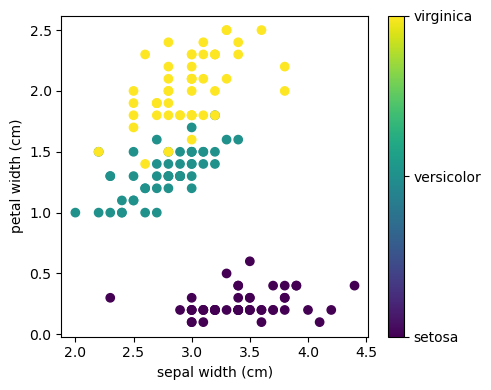

In [9]:
# From: http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html
# The indices of the features that we are plotting
x_index = 1
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

## Classification: k nearest neighbours: kNN

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class. Let’s try it out on our iris classification problem:

In [10]:
# Get the data and target
from sklearn import neighbors
iris = load_iris()
X, y = iris.data, iris.target

In [13]:
# Instantiate the kNN model
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


And that's it! Our model, "knn" is now a trained classifier.

We can plot our class boundaries for our kNN classifier (from http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_knn.html)

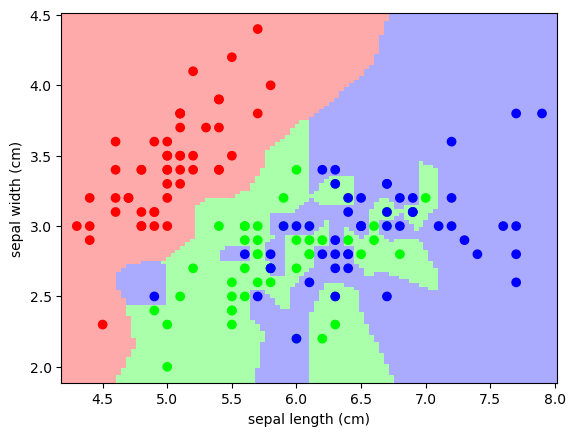

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.show()

## Classification: Logistic Regression

Let's look at a different classifier: Logistic Regression (despite its name, it does classification)

In [21]:
from sklearn.linear_model import LogisticRegression
X, y = iris.data, iris.target
logit = LogisticRegression(multi_class='auto', solver='liblinear')
logit.fit(X, y)
# As before: What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[logit.predict([[3, 5, 4, 2]])])

['virginica']


We get the same result as we did before. However, we're now faced with a critical question: How good are these models? How do we know how well they perform? Are these models reliable?

# Model Evaluation

## Dataset splitting

Datasets are typically divided into two or three subsets:<br><br>
<b>Training</b><br>
<li>Used to optimize model parameters</li><br>
<b>Validation</b><br>
<li>Used to compare the performance of models</li>
<li>Model parameters are not directly exposed to this set</li><br>
<b>Test set</b><br>
<li>Used to evaluate generalization</li><br>

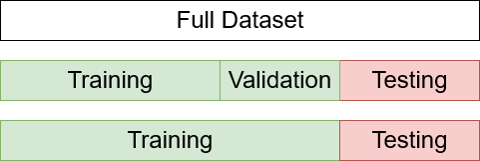

Sklearn provides us with many useful tools for manipulating and separating datasets. We'll first look at train_test_split, which splits data into training/test sets.

In [22]:
from sklearn.model_selection import train_test_split
X, y = iris.data, iris.target
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (150, 4)
y shape: (150,)


In [60]:
# Split into training / testing sets. 
# We can specify the proportion we want in each set using the train_size and/or test_size parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4, stratify=y)
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (90, 4)
X_test shape: (60, 4)
y_train shape: (90,)
y_test shape: (60,)


We now have two sets: one set we use to optimize our models, and another set to evaluate how they perform. Let's recreate our previous classifiers.  
Sklearn estimators have the *score* method, which allows us to quickly evaluate the model performance on a particular dataset:

In [66]:
# Instantiate and train our models
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
logit = LogisticRegression(multi_class='auto',solver='liblinear')
logit.fit(X_train, y_train)

# Evaluate our models!
knn_score = knn.score(X_test, y_test)
logit_score = logit.score(X_test, y_test)
print('kNN accuracy: {}'.format(knn_score))
print('logit accuracy: {}'.format(logit_score))

if(knn_score > logit_score):
    print('knn performs better!')
else:
    print('logit performs better!')
        

kNN accuracy: 0.9333333333333333
logit accuracy: 0.9333333333333333
logit performs better!


Try the following and rerun the previous cells:  
 1) Modify the "n_neighbors" parameter for the kNN classifier  
 2) Change the "train_size" and "test_size" parameters for the data split (they must sum to <= 1)  
 3) Add "stratify=y" to train_test_split so that the labels are balanced in the training and test sets  
 4) *Do nothing and just rerun them*  

Your model performance depends on the type of model you select and how much data is available for training/evaluation. The fourth point highlights something which is deceptively simple: your model performance also depends on which data points are present in your training and validation sets.  
  
The problem is similar when delving into model *hyperparameters*. Hyperparameters are parameters that are not directly optimized by the data, but that can have a huge impact on model performance. Hyperparameters are determined either by heuristic domain-specific information acquisition ("guessing") or preferably cross-validation.

## Cross-Validation

<b>Cross-validation</b> is important for a number of reasons:<br>
<li>Evaluating model performance variability</li>
<li>Determining hyperparameters</li>
<li>Getting reviewers to leave you alone about doing cross-validation</li><br>

<b>K-fold cross-validation (CV)</b> is one example.<br>
To do K-fold CV:<br>
<li>Take your training set</li>
<li>Divide it into K equal subsets (“folds”)</li>
<li>Train on (K-1) folds, and evaluate on the remaining fold</li>
<li>Repeat K times for all folds</li>

Sklearn provides us with convenient functions for doing cross-validation: cross_val_score  
The function defaults to Kfold CV, but other methods are available through sklearn.model_selection

In [82]:
# Import cross validation function:
from sklearn.model_selection import cross_val_score
# Create the classifier:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4)
logit = LogisticRegression(multi_class='auto', solver='liblinear')
logit_scores = cross_val_score(logit, X_train, y_train, cv=5)
print('Logit cross-validation scores: {}'.format(logit_scores))
print('Mean: {}'.format(np.mean(logit_scores)))
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)
print('knn cross-validation scores: {}'.format(knn_scores))
print('Mean: {}'.format(np.mean(knn_scores)))

Logit cross-validation scores: [1.         0.88888889 0.94444444 0.88888889 1.        ]
Mean: 0.9444444444444443
knn cross-validation scores: [0.94444444 1.         0.88888889 0.88888889 0.94444444]
Mean: 0.9333333333333332


# Model Complexity

## Bias / Variance Tradeoff

__Model complexity__ refers to the number of tunable parameters in a model. More complex models are able to represent more complicated relationships between the input and output. 

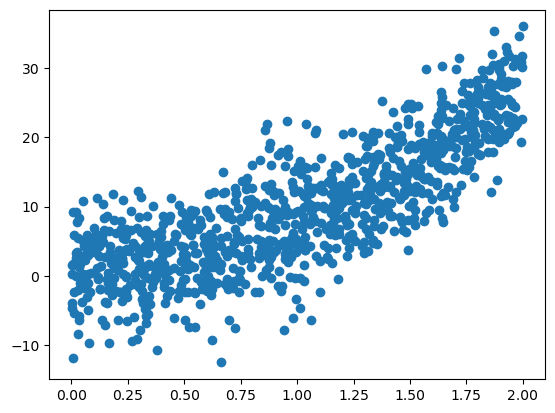

In [115]:
# From: http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_bias_variance.html
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
# Generate some synthetic data
def generating_func(x, err=5):
    return np.random.normal(np.power(x+1, 3), err)
X = 2*np.random.random(1000)
y = generating_func(X, err=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.figure()
plt.scatter(X, y)

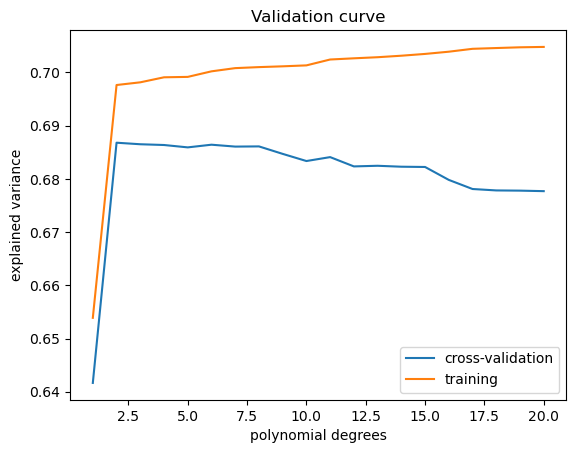

In [116]:
# Fit polynomials of increasing degrees:
from sklearn.model_selection import validation_curve
degrees = np.arange(1, 21)
model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Vary the "degrees" on the pipeline step "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                model, X[:, np.newaxis], y,
                param_name='polynomialfeatures__degree',
                param_range=degrees)

# Plot the mean train score and validation score across folds
plt.plot(degrees, validation_scores.mean(axis=1), label='cross-validation')  
plt.plot(degrees, train_scores.mean(axis=1), label='training')  
plt.legend(loc='best') 
plt.xlabel('polynomial degrees')
plt.ylabel('explained variance')
plt.title('Validation curve');

The plot is typical for machine learning models, and demonstrates the bias/variance tradeoff. The training performance (orange) peaks at a value, then decreases, indicating that the complex models are overfitting the training data.

**Bias error** refers to the error due to incorrect assumptions about the model. For example, fitting a data that follows x^3 using a model that uses x^2 will have some error that can't be improved by additional data.  
**Variance** refers to error caused by variance in the training set; a model whose parameters change significantly with small changes in the training set is susceptible to *overfitting*.  
  
**Task**: In the previous cells, try varying the amount of data, the degree of the polynomial in the generating function, and the error on the data to see the effect of these factors.

## Regularization

Regularization is a way to limit model complexity to what is helpful. This is done to avoid over-fitting and increase the interpretability of the model. It balances model performance with restrictions on model parameters.

[Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) uses linear regression (as before) along with a ridge regularizer (l2 loss on the weights)

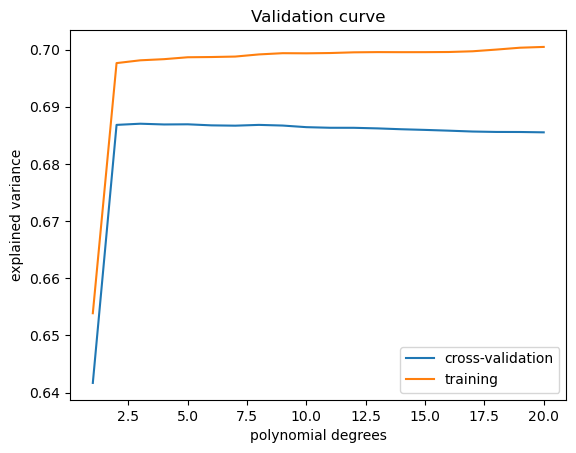

In [117]:
from sklearn.linear_model import Ridge
degrees = np.arange(1, 21)
model = make_pipeline(PolynomialFeatures(), Ridge(alpha=1))

# Vary the "degrees" on the pipeline step "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                model, X[:, np.newaxis], y,
                param_name='polynomialfeatures__degree',
                param_range=degrees)
# Plot the mean train score and validation score across folds
plt.plot(degrees, validation_scores.mean(axis=1), label='cross-validation')  
plt.plot(degrees, train_scores.mean(axis=1), label='training')  
plt.legend(loc='best') 
plt.xlabel('polynomial degrees')
plt.ylabel('explained variance')
plt.title('Validation curve');

Although the curves look similar to before, the variation with the polynomial degrees is much less drastic than before. Regularization is an effective way of trading variance for bias.
Many sklearn estimators use regularization by default: our logistic regression from a previous exercise, for example, uses l2 regularization.